In [2]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("song_data.csv")


In [4]:
df.shape

(18835, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [6]:
df1=df.drop(columns="song_name")
df1.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [7]:
df1["song_duration_s"]=df1["song_duration_ms"]/1000  #Converti la duración de ms a s para mejor visibilización
df1.drop("song_duration_ms", axis=1,inplace=True)

<Figure size 640x480 with 0 Axes>

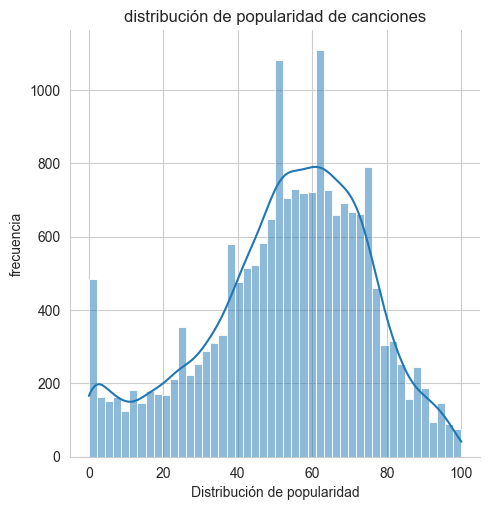

In [8]:
#Distribución de los datos de popularidad de las canciones
plt.figure()    
sns.displot (df1["song_popularity"],kde=True)
plt.title("distribución de popularidad de canciones")
plt.xlabel("Distribución de popularidad")
plt.ylabel("frecuencia")
plt.show()

<Axes: xlabel='song_popularity'>

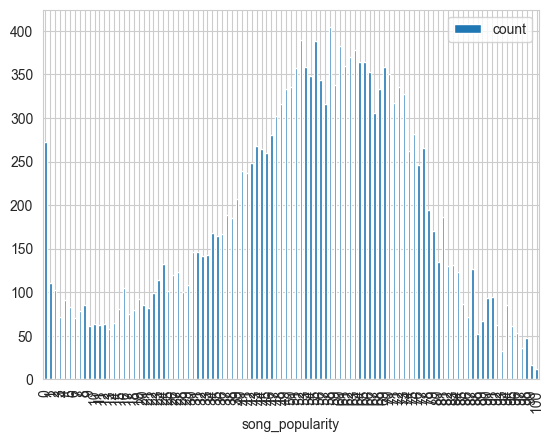

In [9]:
pd.DataFrame(df1['song_popularity'].value_counts()).sort_index().plot.bar()


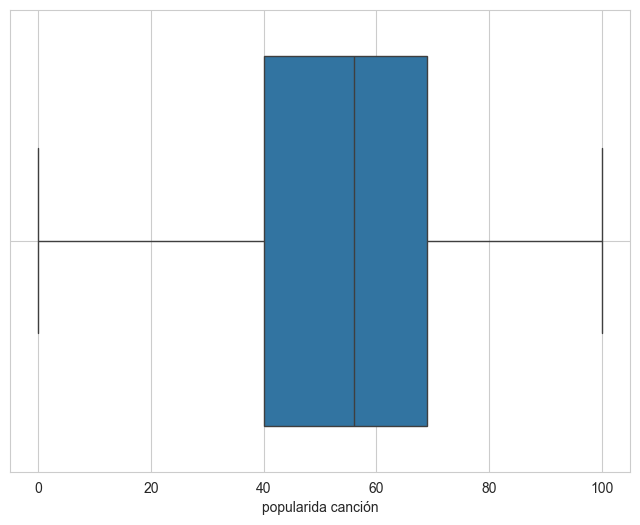

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df1["song_popularity"])  #No hay outliers, pero si está sesgada negativamente

plt.xlabel("popularida canción")
plt.grid(True)
plt.show()


In [11]:
rango_sup= 69+1.5*(69-40)
rango_sup

112.5

In [12]:
rango_inf=40-1.5*(69-40)
rango_inf

-3.5

#### NO hay ningun valor inferio a -3.5, ni superior a 112.5, por lo tanto no hay ningun outlier

## <font color='white'> Medidas de tendencia central y dispersión

In [13]:
resumen=df1.describe().round(4)
resumen

,song_popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_duration_s
count,18835.0000,18835.0000,18835.0000,18835.0000,18835.0000,18835.0000,18835.0000,18835.0000,18835.0000,18835.0000,18835.0000,18835.0000,18835.0000,18835.0000
mean,52.9919,0.2585,0.6333,0.6450,0.0780,5.2892,0.1797,-7.4474,0.6281,0.1021,121.0732,3.9591,0.5280,218.2116
std,21.9057,0.2887,0.1567,0.2141,0.2216,3.6146,0.1440,3.8278,0.4833,0.1044,28.7145,0.2985,0.2446,59.8875
min,0.0000,0.0000,0.0000,0.0011,0.0000,0.0000,0.0109,-38.7680,0.0000,0.0000,0.0000,0.0000,0.0000,12.0000
25%,40.0000,0.0241,0.5330,0.5100,0.0000,2.0000,0.0929,-9.0440,0.0000,0.0378,98.3680,4.0000,0.3350,184.3395
50%,56.0000,0.1320,0.6450,0.6740,0.0000,5.0000,0.1220,-6.5550,1.0000,0.0555,120.0130,4.0000,0.5270,211.3060
75%,69.0000,0.4240,0.7480,0.8150,0.0026,8.0000,0.2210,-4.9080,1.0000,0.1190,139.9310,4.0000,0.7250,242.8440
max,100.0000,0.9960,0.9870,0.9990,0.9970,11.0000,0.9860,1.5850,1.0000,0.9410,242.3180,5.0000,0.9840,1799.3460


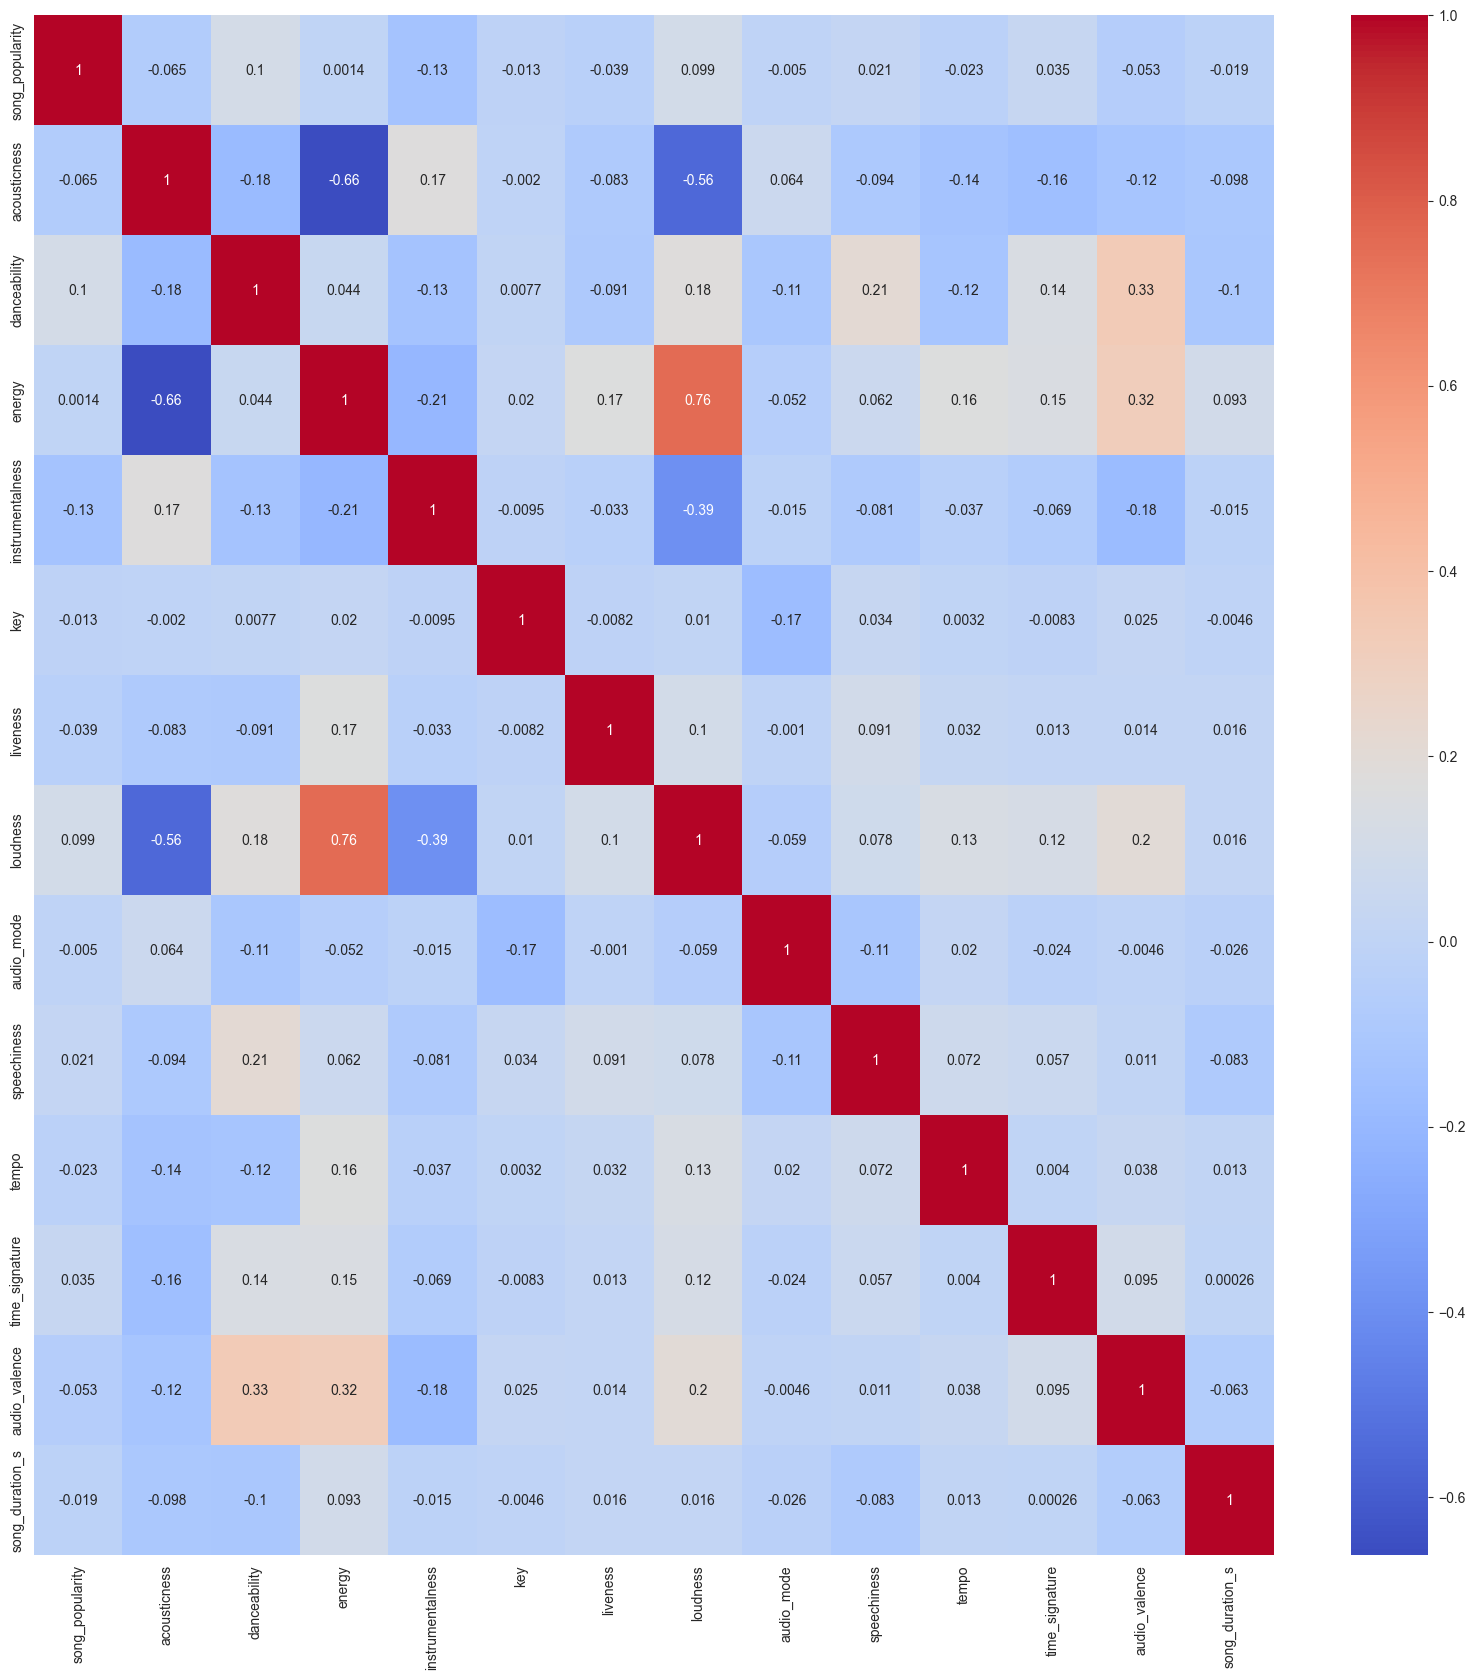

In [14]:
plt.figure(figsize=(20, 20))  #correlacion de pearson
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.show()

### No hay ninguna variable que se autocorrelacione al no presentar ningún valor mayor a +-0.9

<Axes: >

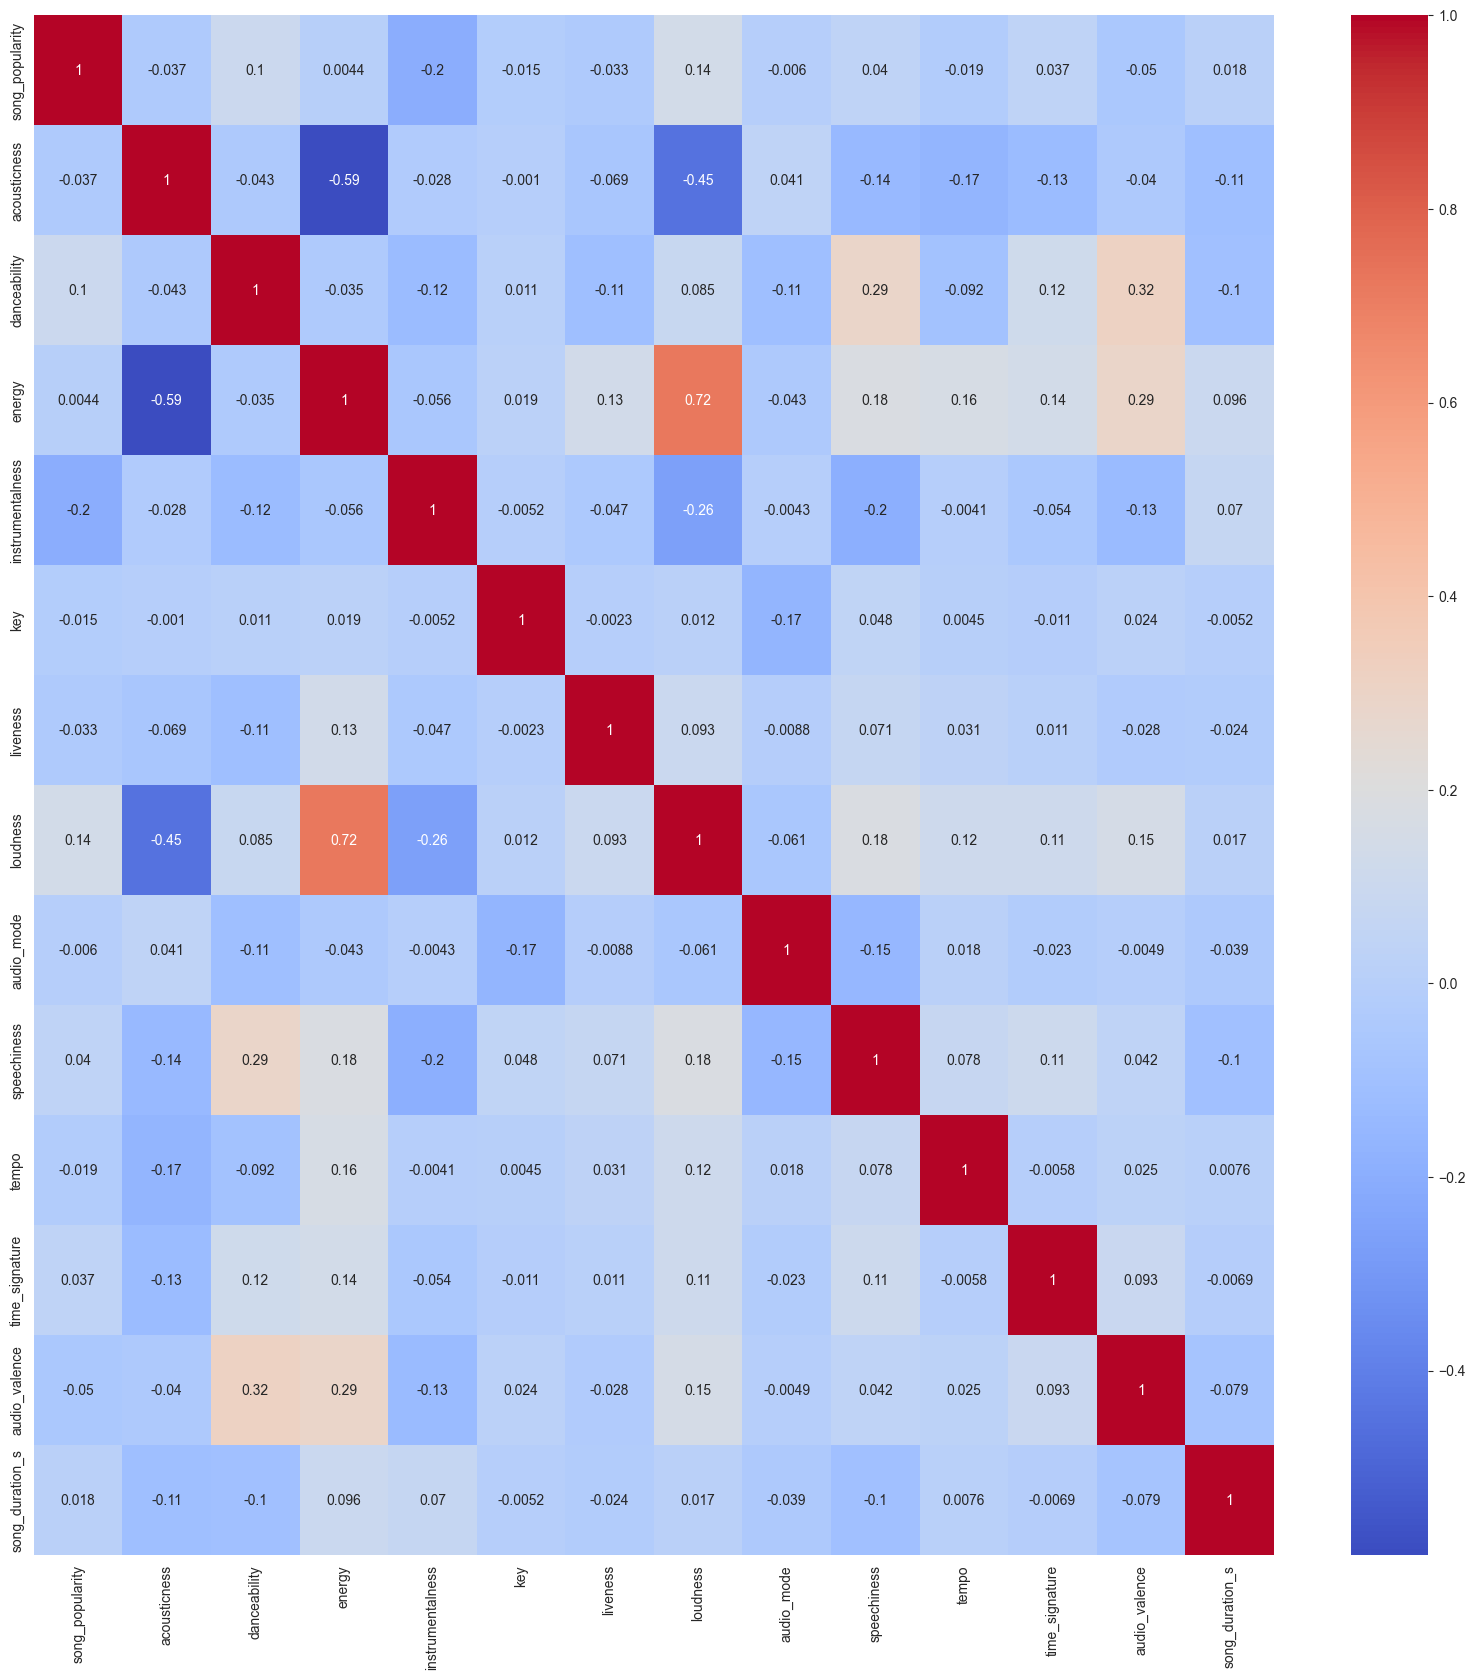

In [15]:
# Se hace una matriz de correlacion de spearman ya que parece no distribuirse de manera normal los datos de popularidad
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(method="spearman"),annot=True,cmap="coolwarm")